<a href="https://colab.research.google.com/github/bank750/geodatasciencee/blob/master/Copy_of_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

## Import library Pandas
ต้อง install ก่อน
*   ถ้าใช้ Anaconda ให้ใช้คำสั่ง conda install ใน command line
*   ถ้าใช้ Python ธรรมดาให้ใช้ pip

แต่สำหรับ Google Colab ไม่ต้องทำการ install แต่ import มาใช้ได้เลย เพราะว่า Colab ได้เตรียมเอาไว้แล้วเรียบร้อย

In [ ]:
import pandas as pd

## ดาวน์โหลดข้อมูล
1.   ดาวน์โหลดจาก Google Drive (ต้องดาวน์โหลด library เพิ่ม และทำการผูกไฟล์)
2.   ดาวน์โหลดจาก github



In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1hizFV4EGG031E5fCeqr4Zi5zL4xL3UAE' #copy from link
downloaded = drive.CreateFile({'id': file_id})

In [ ]:
# Download the file to a local disk as 'exported.xlsx'.
downloaded.GetContentFile('สภาพครัวเรือน.xlsx')

In [ ]:
fromGDrive = pd.read_excel('สภาพครัวเรือน.xlsx')

In [ ]:
fromGithub = pd.read_csv('https://raw.githubusercontent.com/Maplub/AirQualityData2019/master/pm1_2019_h.csv',delimiter=';')

## เลือกและดูข้อมูล

ดู 5 แถวแรก

In [ ]:
fromGDrive.head(2)

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า
0,1,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านสองชั้น,13,NaN
1,2,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านชั้นเดียวยกพื้น,5,NaN


In [ ]:
fromGDrive.rename(columns={"House Number": "HN"})

,HN,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า
0,1,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านสองชั้น,13,NaN
1,2,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านชั้นเดียวยกพื้น,5,NaN
2,3,มีและมีหม้อมิเตอร์เอง,ซื้อ,NaN,ประปา,มีใช้เป็นช่วงๆ(ฤดูร้อน),บ้านชั้นเดียวยกพื้น,19,NaN
3,5,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูแล้งไม่มีน้ำใช้และฤดูฝนน้ำขุ่น),บ้านชั้นเดียวติดพื้น,2(งาน),NaN
4,6,มีและมีหม้อมิเตอร์เอง,บ่อน้ำ,มีดื่มตลอดปี,บ่อน้ำ,มีใช้ตลอดปี,บ้านชั้นเดียวยกพื้น,5,NaN
...,...,...,...,...,...,...,...,...,...
178,267,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านสองชั้น,75,NaN
179,268,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้ตลอดปี,บ้านชั้นครึ่งติดพื้น,2,NaN
180,280,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,NaN,NaN
181,7(1),มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นครึ่งติดพื้น,NaN,NaN


เลือกข้อมูลเฉพาะบางแถวตามเงื่อนไข

อยู่ในรูปแบบ fromGDrive.loc[ใส่เงื่อนไขในวงเล็บสี่เหลี่ยมตรงนี้ เงื่อนไขจะออกมาเป็น True หรือ False]

In [ ]:
fromGDrive.loc[(fromGDrive['ข้อมูลการใช้น้ำบริโภค'] == 'มีดื่มตลอดปี')&(fromGDrive['ข้อมูลการใช้ไฟฟ้า']=='มีและมีหม้อมิเตอร์เอง')]

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า
0,1,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านสองชั้น,13,NaN
1,2,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านชั้นเดียวยกพื้น,5,NaN
3,5,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูแล้งไม่มีน้ำใช้และฤดูฝนน้ำขุ่น),บ้านชั้นเดียวติดพื้น,2(งาน),NaN
4,6,มีและมีหม้อมิเตอร์เอง,บ่อน้ำ,มีดื่มตลอดปี,บ่อน้ำ,มีใช้ตลอดปี,บ้านชั้นเดียวยกพื้น,5,NaN
5,7,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(หน้าฝนขุ่นและหน้าแล้งไม่พอใช้),บ้านชั้นเดียวติดพื้น,NaN,NaN
...,...,...,...,...,...,...,...,...,...
177,265,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,"ประปา,บ่อน้ำ",มีใช้ตลอดปี,บ้านชั้นครึ่งติดพื้น,NaN,NaN
178,267,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านสองชั้น,75,NaN
179,268,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้ตลอดปี,บ้านชั้นครึ่งติดพื้น,2,NaN
180,280,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,NaN,NaN


In [ ]:
(fromGDrive['ข้อมูลการใช้น้ำบริโภค'] == 'มีดื่มตลอดปี')&(fromGDrive['ข้อมูลการใช้ไฟฟ้า']=='มีและมีหม้อมิเตอร์เอง')

0       True
1       True
2      False
3       True
4       True
       ...  
178     True
179     True
180     True
181     True
182    False
Length: 183, dtype: bool

In [ ]:
fromGDrive[fromGDrive['ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา'].isna()]

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า
172,258,มีและมีหม้อมิเตอร์เอง,NaN,มีดื่มตลอดปี,ประปา,มีใช้ตลอดปี,ชั้นครึ่ง,NaN,NaN


ข้อมูลที่โหลดมา บางคอลัมน์ยังไม่เป็นตัวเลข เราจะใช้ operator มากกว่า น้อยกว่า ไม่ได้ ดังนั้นให้ตรวจสอบก่อน

สำหรับข้อมูลนี้ไม่มีคอลัมน์ไหนเป็นตัวเลขเลย เพราะมีตัวหนังสือปนทุกคอลัมน์

และข้อมูลนี้ pandas ให้เป็นชนิด object ทุกคอลัมน์ แสดงว่ามีหลาย data types ผสมอยู่

In [ ]:
fromGDrive.dtypes

House Number                          object
ข้อมูลการใช้ไฟฟ้า                     object
ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา      object
ข้อมูลการใช้น้ำบริโภค                 object
ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา      object
ข้อมูลการใช้น้ำอุปโภค                 object
ลักษณะของบ้าน                         object
จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ    object
จำนวนที่ดินทำกิน (ไร่)-เช่า           object
dtype: object

หาแถวที่จำนวนที่ดินทำกินที่เช่าไม่เป็นเป็น NaN ใช้คำสั่ง pd.notnull()

แต่ถ้าหาแถวที่เป็น NaN ใช้คำสั่ง pd.isnull()

In [ ]:
fromGDrive[pd.notnull(fromGDrive['จำนวนที่ดินทำกิน (ไร่)-เช่า'])]

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า
27,33,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,"ประปา,บ่อน้ำหน้าบ้าน",มีใช้เป็นช่วงๆ(ฤดูแล้งน้ำน้อย),บ้านสองชั้น,NaN,3
51,59,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้ตลอดปี,บ้านสองชั้น,NaN,5
59,68,มีและมีหม้อมิเตอร์เอง,น้ำตู้หยอดเหรียญ,มีดื่มเป็นช่วงๆ,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,NaN,6
93,110,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(หน้าแล้งน้ำแห้ง หน้าฝนน้ำขุ่น),บ้านสองชั้น,25,5
100,123,มีและมีหม้อมิเตอร์เอง,โรงน้ำดื่มหมู่บ้าน,มีดื่มตลอดปี,ประปา,มีใช้ตลอดปี,บ้านสองชั้น,7,5
110,138,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวติดพื้น,NaN,35
112,141,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านสองชั้น,3,10
131,174,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้ตลอดปี,บ้านสองชั้น,NaN,20
137,183,มีและมีหม้อมิเตอร์เอง,โรงน้ำดื่มหมู่บ้าน,มีดื่มตลอดปี,บ่อน้ำส่วนตัว,มีใช้ตลอดปี,อื่นๆ,30,5~6
145,199,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,"ประปา,น้ำบ่อ",NaN,บ้านชั้นเดียวยกพื้น,10,1


เลือกคอลัมน์เดียว เลือกได้ 2 วิธี

In [ ]:
fromGDrive.ข้อมูลการใช้ไฟฟ้า

0                 มีและมีหม้อมิเตอร์เอง
1                 มีและมีหม้อมิเตอร์เอง
2                 มีและมีหม้อมิเตอร์เอง
3                 มีและมีหม้อมิเตอร์เอง
4                 มีและมีหม้อมิเตอร์เอง
                     ...               
178               มีและมีหม้อมิเตอร์เอง
179               มีและมีหม้อมิเตอร์เอง
180               มีและมีหม้อมิเตอร์เอง
181               มีและมีหม้อมิเตอร์เอง
182    มีแต่มีการต่อพ่วงจากบ้านของ(262)
Name: ข้อมูลการใช้ไฟฟ้า, Length: 183, dtype: object

In [ ]:
fromGDrive['ข้อมูลการใช้ไฟฟ้า']

0                 มีและมีหม้อมิเตอร์เอง
1                 มีและมีหม้อมิเตอร์เอง
2                 มีและมีหม้อมิเตอร์เอง
3                 มีและมีหม้อมิเตอร์เอง
4                 มีและมีหม้อมิเตอร์เอง
                     ...               
178               มีและมีหม้อมิเตอร์เอง
179               มีและมีหม้อมิเตอร์เอง
180               มีและมีหม้อมิเตอร์เอง
181               มีและมีหม้อมิเตอร์เอง
182    มีแต่มีการต่อพ่วงจากบ้านของ(262)
Name: ข้อมูลการใช้ไฟฟ้า, Length: 183, dtype: object

เลือกหลาย ๆ คอลัมน์

In [ ]:
fromGDrive[['ข้อมูลการใช้ไฟฟ้า','ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา']]

,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา
0,มีและมีหม้อมิเตอร์เอง,ซื้อ
1,มีและมีหม้อมิเตอร์เอง,ซื้อ
2,มีและมีหม้อมิเตอร์เอง,ซื้อ
3,มีและมีหม้อมิเตอร์เอง,ซื้อ
4,มีและมีหม้อมิเตอร์เอง,บ่อน้ำ
...,...,...
178,มีและมีหม้อมิเตอร์เอง,ซื้อ
179,มีและมีหม้อมิเตอร์เอง,ซื้อ
180,มีและมีหม้อมิเตอร์เอง,ซื้อ
181,มีและมีหม้อมิเตอร์เอง,ซื้อ


เลือกแถวตามเงื่อนไข และเลือกเฉพาะบางคอลัมน์มาแสดง

In [ ]:
fromGDrive.loc[fromGDrive['ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา']=="ซื้อ",['ข้อมูลการใช้ไฟฟ้า','ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา']]

,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา
0,มีและมีหม้อมิเตอร์เอง,ซื้อ
1,มีและมีหม้อมิเตอร์เอง,ซื้อ
2,มีและมีหม้อมิเตอร์เอง,ซื้อ
3,มีและมีหม้อมิเตอร์เอง,ซื้อ
5,มีและมีหม้อมิเตอร์เอง,ซื้อ
...,...,...
178,มีและมีหม้อมิเตอร์เอง,ซื้อ
179,มีและมีหม้อมิเตอร์เอง,ซื้อ
180,มีและมีหม้อมิเตอร์เอง,ซื้อ
181,มีและมีหม้อมิเตอร์เอง,ซื้อ


เลือกค่า unique (ภาษา SQL จะเรียก distinct)

In [ ]:
fromGDrive['ข้อมูลการใช้ไฟฟ้า'].unique()

array(['มีและมีหม้อมิเตอร์เอง', 'มีแต่มีการต่อพ่วงจากบ้านของ',
       'มีจากแหล่งอื่น(ต่อสายไฟจากส่วนกลาง)', 'ไม่มี',
       'มีแต่มีการต่อพ่วงจากบ้านของ(262)'], dtype=object)

จะดูสรุปข้อมูลในคอลัมน์ก็ได้

In [ ]:
fromGDrive['ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา'].describe()

count      182
unique      31
top       ซื้อ
freq       139
Name: ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา, dtype: object

In [ ]:
fromGDrive['ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา'].value_counts()

ซื้อ                        139
น้ำตู้หยอดเหรียญ              4
โรงน้ำดื่มหมู่บ้าน            4
สหกรณ์                        3
ซิ้อ                          2
โรงน้ำดื่มในหมู่บ้าน          2
ซือ                           2
ในหมู่บ้าน                    2
ประปา                         2
บ่อบาดาล                      1
น้ำจากหมู่บ้าน,น้ำตู้         1
บ่อน้ำส่วนตัว                 1
บ่อน้ำหมู่บ้าน                1
บ่อน้ำ                        1
ซื้อ,สหกรณ์                   1
ซื้อจากโรงงาน                 1
ถาวรพัฒนา                     1
โรงงานผลิตน้ำส่วนตัว          1
น้ำตูหยอดเหรียญ               1
น้ำดื่มดิบ(ถาวร)              1
ซื้อ,น้ำประปา                 1
โรงงาน                        1
ตู้น้ำหยอดเหรียญ              1
น้ำดื่มในหมู่บ้าน             1
น้ำตู้หยอดเหรียญ,น้ำถัง       1
น้ำจากหมู่บ้า                 1
กรองน้ำประปา                  1
แหล่งข้างเคียง                1
น้ำบาดาล                      1
โรงน้ำดื่ม,ตู้หยอดเหรียญ      1
น้ำบ่อ                        1
Name: ข้

## แก้ไขข้อมูล

แยกวงเล็บออกมา

In [ ]:
fromGDrive[fromGDrive['ข้อมูลการใช้น้ำอุปโภค'].str.contains(')',na=False,regex=False)]

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า
0,1,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านสองชั้น,13,NaN
1,2,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูฝนน้ำขุ่น),บ้านชั้นเดียวยกพื้น,5,NaN
2,3,มีและมีหม้อมิเตอร์เอง,ซื้อ,NaN,ประปา,มีใช้เป็นช่วงๆ(ฤดูร้อน),บ้านชั้นเดียวยกพื้น,19,NaN
3,5,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูแล้งไม่มีน้ำใช้และฤดูฝนน้ำขุ่น),บ้านชั้นเดียวติดพื้น,2(งาน),NaN
5,7,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(หน้าฝนขุ่นและหน้าแล้งไม่พอใช้),บ้านชั้นเดียวติดพื้น,NaN,NaN
11,14,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(มีปัญหาบางครั้ง),บ้านสองชั้น,28,NaN
24,29,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(ฤดูแล้งไม่มีใช้),บ้านสองชั้น,4,NaN
27,33,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,"ประปา,บ่อน้ำหน้าบ้าน",มีใช้เป็นช่วงๆ(ฤดูแล้งน้ำน้อย),บ้านสองชั้น,NaN,3
29,36,มีและมีหม้อมิเตอร์เอง,"ซื้อ,น้ำประปา",มีดื่มตลอดปี,ดูดจากลำห้วย,มีใช้เป็นช่วงๆ(ช่วงเครื่องดูดเสีย),บ้านชั้นเดียวติดพื้น,2,NaN
41,49,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ(น้ำขุ่น),บ้านชั้นเดียวติดพื้น,NaN,NaN


In [ ]:
fromGDrive[['ข้อมูลการใช้น้ำอุปโภค','หมายเหตุ']] = fromGDrive['ข้อมูลการใช้น้ำอุปโภค'].str.split('(',expand=True)

In [ ]:
fromGDrive.head()

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า,หมายเหตุ
0,1,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านสองชั้น,13,NaN,ฤดูฝนน้ำขุ่น)
1,2,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,5,NaN,ฤดูฝนน้ำขุ่น)
2,3,มีและมีหม้อมิเตอร์เอง,ซื้อ,NaN,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,19,NaN,ฤดูร้อน)
3,5,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวติดพื้น,2(งาน),NaN,ฤดูแล้งไม่มีน้ำใช้และฤดูฝนน้ำขุ่น)
4,6,มีและมีหม้อมิเตอร์เอง,บ่อน้ำ,มีดื่มตลอดปี,บ่อน้ำ,มีใช้ตลอดปี,บ้านชั้นเดียวยกพื้น,5,NaN,None


ลบวงเล็บออก

In [ ]:
fromGDrive['หมายเหตุ']=fromGDrive['หมายเหตุ'].str.replace(')','',regex=True)

In [ ]:
fromGDrive.head()

,House Number,ข้อมูลการใช้ไฟฟ้า,ข้อมูลการใช้น้ำบริโภค-แหล่งที่มา,ข้อมูลการใช้น้ำบริโภค,ข้อมูลการใช้น้ำอุปโภค-แหล่งที่มา,ข้อมูลการใช้น้ำอุปโภค,ลักษณะของบ้าน,จำนวนที่ดินทำกิน (ไร่)-เป็นเจ้าของ,จำนวนที่ดินทำกิน (ไร่)-เช่า,หมายเหตุ
0,1,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านสองชั้น,13,NaN,ฤดูฝนน้ำขุ่น
1,2,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,5,NaN,ฤดูฝนน้ำขุ่น
2,3,มีและมีหม้อมิเตอร์เอง,ซื้อ,NaN,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวยกพื้น,19,NaN,ฤดูร้อน
3,5,มีและมีหม้อมิเตอร์เอง,ซื้อ,มีดื่มตลอดปี,ประปา,มีใช้เป็นช่วงๆ,บ้านชั้นเดียวติดพื้น,2(งาน),NaN,ฤดูแล้งไม่มีน้ำใช้และฤดูฝนน้ำขุ่น
4,6,มีและมีหม้อมิเตอร์เอง,บ่อน้ำ,มีดื่มตลอดปี,บ่อน้ำ,มีใช้ตลอดปี,บ้านชั้นเดียวยกพื้น,5,NaN,None


## ทำ pivot ย้ายข้อมูลเป็น long หรือ wide

จะใชัตารางอีกอันทำ pivot

In [ ]:
fromGithub

,Series,Time,h,Value
3351,mqttdata.mean {sensorid: NDTH/MCTH001},2019-04-01,7,140.750000
3352,mqttdata.mean {sensorid: NDTH/MCTH001},2019-04-01,8,166.500000
3353,mqttdata.mean {sensorid: NDTH/MCTH001},2019-04-01,9,185.000000
3354,mqttdata.mean {sensorid: NDTH/MCTH001},2019-04-01,10,188.083333
3355,mqttdata.mean {sensorid: NDTH/MCTH001},2019-04-01,11,153.416667
...,...,...,...,...
447336,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,10,31.800000
447337,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,11,30.525000
447338,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,12,22.575000
447339,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,13,22.650000


In [ ]:
fromGithub.dtypes

Series     object
Time       object
h           int64
Value     float64
dtype: object

clean ข้อมูลก่อน ลบแถวที่ไม่มีค่าและไม่มีบอกหมายเลขเซ็นเซอร์ออก

In [ ]:
fromGithub = fromGithub[fromGithub['Value'].notnull()]

In [ ]:
fromGithub = fromGithub[~(fromGithub['Series']=='mqttdata.mean {sensorid: }')]

ตัดข้อมูลเซ็นเซอร์มาแค่ 1 ตัวเพื่อให้เข้าใจง่าย

ในการตัดออกมาต้องใช้คำสั่ง copy มิเช่นนั้นจะมีปัญหาตอนเปลี่ยนวันที่

In [ ]:
s102 = fromGithub.loc[fromGithub['Series']=='mqttdata.mean {sensorid: nansensor/CU-S0102}'].copy()

ดู Type ของคอลัมน์ทั้งหมด จะเห็นว่า Time เป็น object เราจะเปลี่ยนให้เป็น datetime เพื่อจะได้คำนวณแบบเวลาได้

In [ ]:
s102

,Series,Time,h,Value
445441,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,11,53.592222
445442,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,12,51.733333
445443,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,13,40.250000
445444,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,14,40.858333
445445,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,15,39.775000
...,...,...,...,...
447336,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,10,31.800000
447337,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,11,30.525000
447338,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,12,22.575000
447339,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,13,22.650000


In [ ]:
s102.dtypes

Series     object
Time       object
h           int64
Value     float64
dtype: object

In [ ]:
pd.to_datetime(s102['Time'])

445441   2019-02-14
445442   2019-02-14
445443   2019-02-14
445444   2019-02-14
445445   2019-02-14
            ...    
447336   2019-05-04
447337   2019-05-04
447338   2019-05-04
447339   2019-05-04
447340   2019-05-04
Name: Time, Length: 733, dtype: datetime64[ns]

ปรับ index ใหม่หน่อย (จริง ๆ ไม่ปรับก็ได้)

In [ ]:
s102.reset_index(drop=True)

,Series,Time,h,Value
0,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,11,53.592222
1,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,12,51.733333
2,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,13,40.250000
3,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,14,40.858333
4,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-02-14,15,39.775000
...,...,...,...,...
728,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,10,31.800000
729,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,11,30.525000
730,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,12,22.575000
731,mqttdata.mean {sensorid: nansensor/CU-S0102},2019-05-04,13,22.650000


In [ ]:
s102.Time = pd.to_datetime(s102.Time)

In [ ]:
s102.dtypes

Series            object
Time      datetime64[ns]
h                  int64
Value            float64
dtype: object

อยากรู้ว่าแต่ละวันมีค่าเหมือนกันหรือไม่ โดยเอาชั่วโมงเดียวกันมาเทียบกัน ต้องทำ pivot

In [ ]:
s102.pivot(index='Time',columns='h',values='Value')

h,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Time,,,,,,,,,,,,,,,,,,,,,,,,
2019-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.592222,51.733333,40.250000,40.858333,39.775000,38.500000,38.418182,53.100000,53.083333,44.691667,44.641667,41.333333,39.233333
2019-02-15,38.808333,41.083333,40.033333,39.925000,40.066667,40.233333,40.116667,43.875000,61.050000,67.216667,71.290909,54.500000,46.516667,44.716667,45.375000,48.581818,51.683333,54.775000,53.666667,52.600000,50.441667,49.633333,49.391667,49.508333
2019-02-16,48.983333,47.358333,46.908333,48.075000,46.566667,46.508333,48.883333,56.866667,60.783333,56.741667,50.875000,44.808333,46.800000,49.241667,44.733333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.635000,27.350000,24.241667,24.500000,22.891667,21.858333,20.758333,21.450000,22.716667,24.358333,25.208333,25.525000,25.175000,24.508333
2019-02-19,24.158333,24.391667,25.783333,26.525000,27.558333,29.325000,31.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.322857,30.316667,30.000000,28.183333,28.891667,27.700000
2019-02-21,26.875000,27.975000,26.466667,26.825000,27.000000,27.045455,27.053846,35.233333,36.658333,56.958333,55.058333,54.175000,52.725000,40.833333,31.008333,29.758333,32.516667,33.850000,39.808333,41.033333,36.683333,38.391667,51.708333,40.033333
2019-02-22,38.608333,44.125000,44.500000,43.375000,41.308333,45.341667,44.672727,54.033333,56.825000,78.350000,76.216667,59.458333,37.241667,35.575000,36.291667,33.200000,30.316667,29.983333,31.008333,31.816667,32.891667,38.308333,48.008333,53.615000
2019-02-23,55.200000,60.541667,59.025000,71.908333,78.608333,81.250000,83.481818,94.450000,71.491667,75.466667,61.591667,49.758333,41.550000,41.983333,45.608333,49.081818,45.675000,37.458333,37.225000,40.441667,67.033333,119.775000,76.041667,78.733333


## Plotting

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


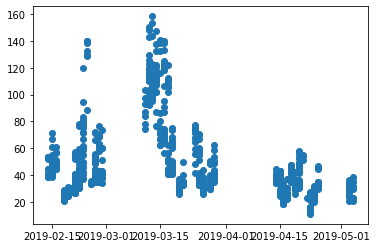

In [ ]:
plt.scatter(s102.Time,s102.Value)

In [ ]:
avg = s102.groupby('h').mean()

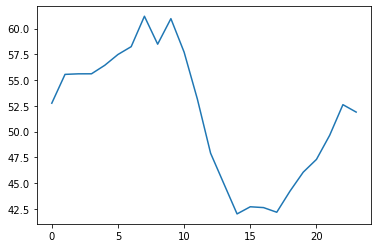

In [ ]:
plt.plot(avg.Value)

In [ ]:
pivot = s102.pivot(index='Time',columns='h',values='Value')

In [ ]:
pivot.index

DatetimeIndex(['2019-02-14', '2019-02-15', '2019-02-16', '2019-02-18',
               '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22',
               '2019-02-23', '2019-02-24', '2019-02-25', '2019-02-26',
               '2019-02-27', '2019-02-28', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16',
               '2019-03-17', '2019-03-18', '2019-03-20', '2019-03-21',
               '2019-03-24', '2019-03-25', '2019-03-26', '2019-03-28',
               '2019-03-29', '2019-04-14', '2019-04-15', '2019-04-16',
               '2019-04-17', '2019-04-18', '2019-04-19', '2019-04-20',
               '2019-04-21', '2019-04-22', '2019-04-23', '2019-04-24',
               '2019-04-25', '2019-05-03', '2019-05-04'],
              dtype='datetime64[ns]', name='Time', freq=None)

In [ ]:
datelabel = pivot.index.astype('string')

In [ ]:
len(datelabel)

43

In [ ]:
np.arange(len(datelabel))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42])

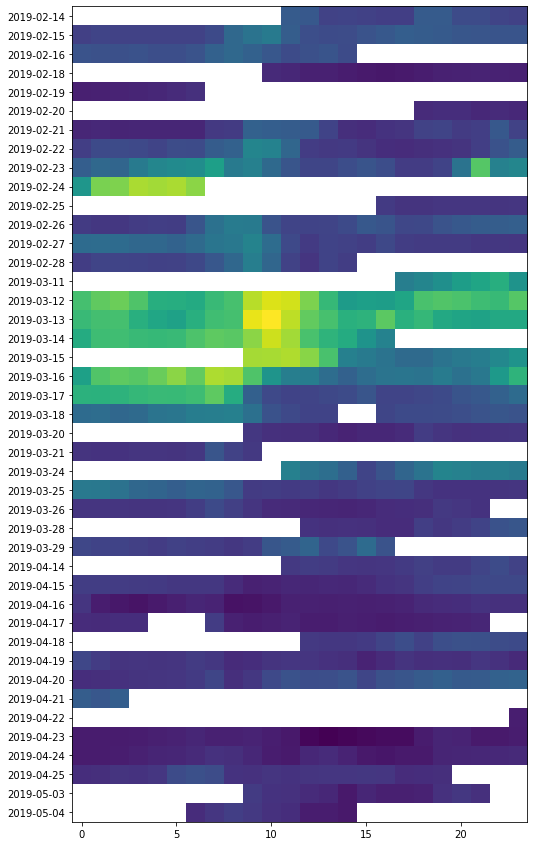

In [ ]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
ax=plt.gca()
ax.set_yticks(np.arange(len(datelabel)))
ax.set_yticklabels(datelabel)
plt.imshow(pivot)